# Original Data

### Set initial settings

In [1]:
import sys
import warnings

# Add base directory in path
sys.path.append('../../')

# Ignore future warning
warnings.filterwarnings("ignore", category=FutureWarning)

### Import libs

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from src.ml import experiment
from src.plot import plot_by_feature_selection_method

### Load original data

In [3]:
# Set a random seed
np.random.seed(7)

# Read the dataset
dataset = pd.read_csv("../../data/df_original_100000.csv")

# Extract the labels
y = np.array(dataset["Label"])
del dataset["Label"]

# Define X (Features)
X = np.array(dataset)

print(f"Shape Features (X): {X.shape}")
print(f"Shape Features (y): {y.shape}")

result = []

Shape Features (X): (100000, 79)
Shape Features (y): (100000,)


### Train models

In [4]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5), 
    "DecisionTree": DecisionTreeClassifier(), 
    "RandomForest":RandomForestClassifier(), 
    "GaussianNB":GaussianNB(var_smoothing=1e-02)
}

In [5]:
final_result = experiment(models=models, X=X, y=y)

KNN Trained
DecisionTree Trained
RandomForest Trained
GaussianNB Trained


### Print and save result file

In [6]:
final_result.to_csv("./original_data_result.csv", index=False)
final_result

,model,anonymized train,anonymized test,accuracy,precision,recall,f1_score
0,KNN,True,True,77.607%,70.671%,94.380%,80.822%
1,KNN,True,False,77.618%,70.676%,94.402%,80.833%
2,KNN,False,True,77.553%,70.648%,94.272%,80.768%
3,KNN,False,False,99.999%,100.000%,99.998%,99.999%
4,DecisionTree,True,True,63.727%,63.413%,60.130%,60.835%
5,DecisionTree,True,False,52.260%,54.191%,60.556%,57.013%
6,DecisionTree,False,True,72.684%,66.780%,91.536%,77.102%
7,DecisionTree,False,False,100.000%,100.000%,100.000%,100.000%
8,RandomForest,True,True,65.778%,66.881%,70.204%,66.844%
9,RandomForest,True,False,60.734%,56.409%,98.624%,71.682%


### Result Plots

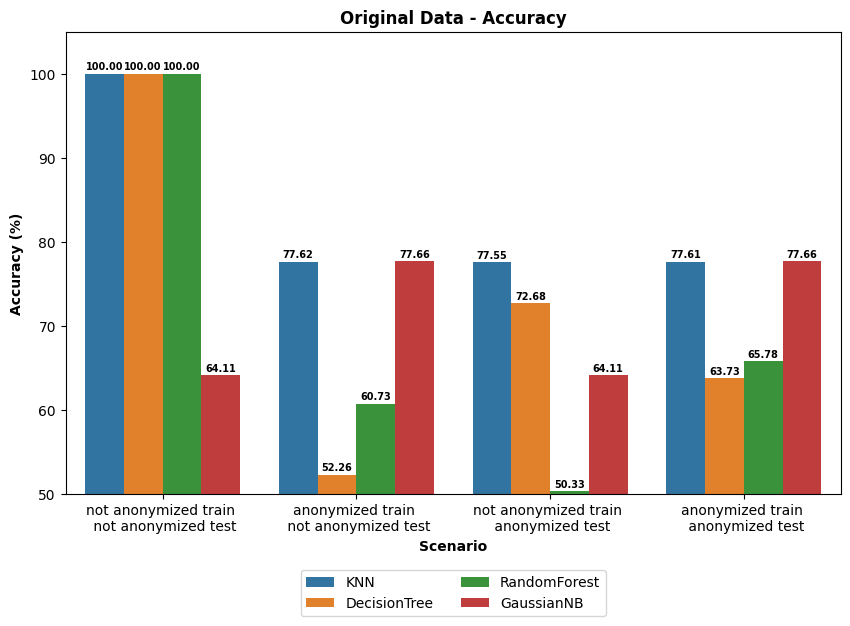

In [7]:
plot_by_feature_selection_method(title="Original Data - Accuracy", metric_name="accuracy", dataframe_file_path="./original_data_result.csv", plot_path="./original_data_accuracy.png", y_lim_bottom=50)

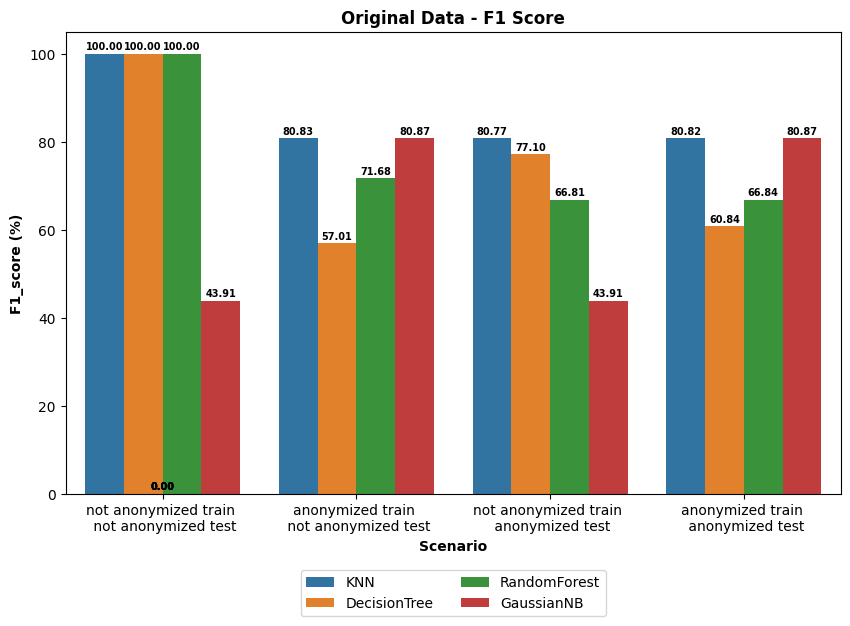

In [8]:
plot_by_feature_selection_method(title="Original Data - F1 Score", metric_name="f1_score", dataframe_file_path="./original_data_result.csv", plot_path="./original_data_f1_score.png")